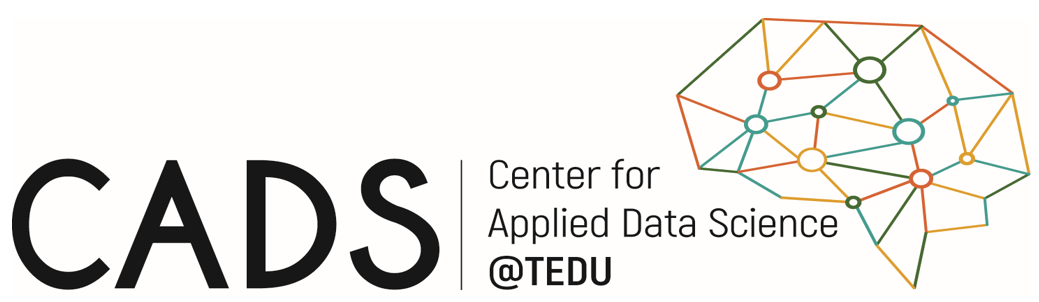

***

# Keşifsel Veri Analizi ve İstatistiksel Çıkarımlar

Keşifsel veri analizi ve istatistiksel çıkarımlar ile ilgili bir sezgi elde etmiştik. Şimdi ise uygulamada nasıl keşifsel veri analizi yapacağımızı inceleyelim.

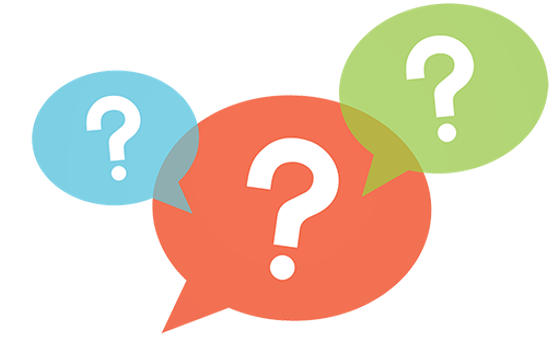

Keşifsel veri analizi yapmanın en önemli unsuru veriye **soru sormaktır**. İlgili problemle ilgili sorular sorup, bu zamana kadar öğrendiğimiz ve bu eğitimde öğreneceğimiz araçlarla bu soruları cevapladığımız zaman, aslında keşifsel veri analizi yapmış oluyoruz.

Bu eğitim kapsamında, Pima Indians ırkından kadınların diyabet olmalarının nedenlerini araştıracağız:

## Diyabet Veri Seti

<div>
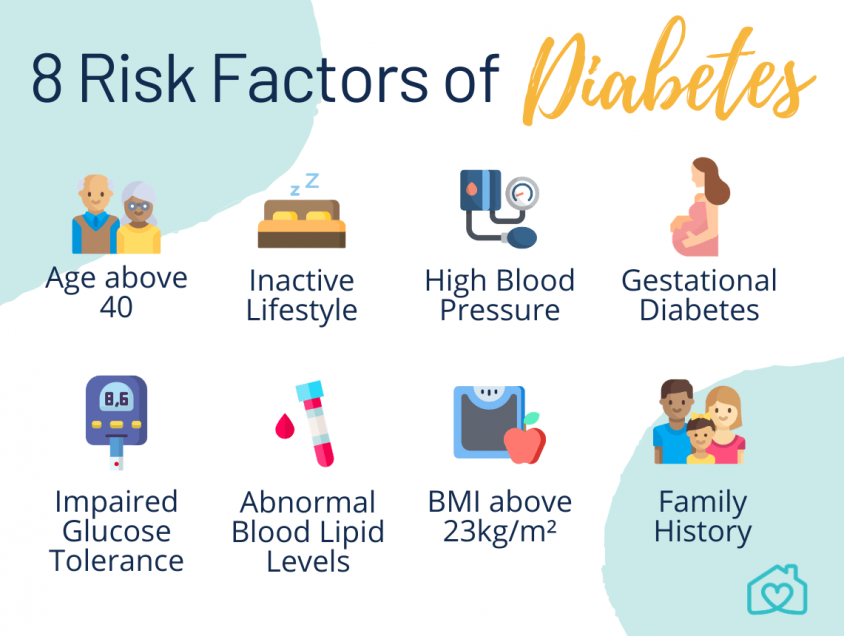
</div>

**Diyabet** veri seti, Pima Indians ırkından kadınların tıbbi kayıtlarını ve her birinin diyabet hastası olup olmadığı bilgisini içeriyor. Bir veri bilimci olarak bizim amacımız, diyabet olmayı etkileyen faktörleri araştırmak ve bir tahmin modeli geliştirmek. Bu eğitimde daha çok diyabet olmayı etkileyen faktörleri araştırma üzerinde duracağız.

Veri seti: https://raw.githubusercontent.com/cads-tedu/DSPG/master/Veri%20Setleri/diabetes.csv

Veri setindeki değişkenler:

- **Pregnancies**: Hamile kalma sayısı 
- **Glucose**: Glikoz
- **BloodPressure**: Kan basıncı 
- **SkinThickness**: Deri kalınlığı
- **Insulin**: İnsülin 
- **BMI**: Beden kitle endeksi 
- **DiabetesPedigreeFunction**: Genetiğe göre diyabet olma ihtimalini hesaplayan fonksiyon 
- **Age**: Yaş 
- **Outcome**: Diyabet olup olmadığı bilgisi 

bilgilerini içermektedir.

Veri odaklı çalışmamıza başlamadan önce alanla ilgili daha iyi bir bilgi sahibi olmak için ufak bir **google** araştırması yapmak veya direkt **alan bilgisine** sahip biriyle çalışmayı yürütmek daha iyi bir analiz yapmanıza fayda sağlayacaktır.

Yaptığımız araştırmalara göre, diyabet olma riskini arttıran faktörlerin:

1. **Fazla kilo**
2. **Hareketsizlik**
3. **Aile geçmişinde diyabet öyküsü**
4. **Yaş artışı**
5. **Hamilelikte diyabet öyküsü**
6. **Yüksek kan basıncı**
7. **Anormal kolesterol ve trigliserit seviyeleri**

olduğu düşünülmektedir. Daha detaylı bilgi için: https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

Veri setini aktararak analizimize başlayalım!

In [57]:
# Temel kütüphaneleri içeri aktaralım
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Veri setini "diyabet" isimli bir dataframe'e atayalım
diyabet = pd.read_csv('https://raw.githubusercontent.com/cads-tedu/DSPG/master/Veri%20Setleri/diabetes.csv')

## Keşifsel Veri Analizi

Herhangi bir analize başlamadan önce, rutin kontrolleri yapmamız gerekiyor. Bu kontroller:
    
1. Veri setinin ilk 5 satırını kontrol etmek
2. Değişken tiplerini kontrol etmek
3. Değişkenlerin özet istatistiklerini kontrol etmek
4. Kayıp verileri kontrol etmek
5. Tekrarlı satırları kontrol etmek

gibi analizleri içermektedir.

### Rutin Kontroller

In [59]:
# İlk 5 satır
diyabet.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [60]:
# Değişken tipleri
diyabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri setindeki tüm değişkenlerin nümerik olduğunu görüyoruz. Değişkenlerin değerlerini ve dağılımlarını daha ayrıntılı incelediğimizde bazı değişkenleri kategorik hale getirmeye karar verebiliriz.

In [61]:
# Özet istatistikler
diyabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Değişkenlerin özet istatistiklerini incelediğimizde **glukoz, kan basıncı, deri kalınlığı, insülin ve BMI** değişkenlerinin minimum değerlerinin 0 olduğunu görüyoruz. Normal şartlarda bu değerlerin 0 olması mümkün değil. Kayıp veri olması gereken gözlemler 0 olarak girilmiş olabilir mi? Bu değişkenlerin kaç gözleminin 0 olduğuna bakalım.

In [62]:
# Glukoz, kan basıncı, deri kalınlığı, insülin ve BMI değişkelerinde 0 olan gözlemlerin sayısı
print("Glukoz değişkeninde 0 olan gözlemlerin sayısı: " + str(len(diyabet[diyabet.Glucose == 0])))
print("Kan basıncı değişkeninde 0 olan gözlemlerin sayısı: " + str(len(diyabet[diyabet.BloodPressure == 0])))
print("Deri kalınlığı değişkeninde 0 olan gözlemlerin sayısı: " + str(len(diyabet[diyabet.SkinThickness == 0])))
print("İnsülin değişkeninde 0 olan gözlemlerin sayısı: " + str(len(diyabet[diyabet.Insulin == 0])))
print("BMI değişkeninde 0 olan gözlemlerin sayısı: " + str(len(diyabet[diyabet.BMI == 0])))

Glukoz değişkeninde 0 olan gözlemlerin sayısı: 5
Kan basıncı değişkeninde 0 olan gözlemlerin sayısı: 35
Deri kalınlığı değişkeninde 0 olan gözlemlerin sayısı: 227
İnsülin değişkeninde 0 olan gözlemlerin sayısı: 374
BMI değişkeninde 0 olan gözlemlerin sayısı: 11


Özellikle deri kalınlığı ve insülin değişkenlerinde çok fazla 0 değeri var. Bu beş değişkenin hiçbiri normalde 0 değerini alamayacağı için bu gözlemleri kayıp veri olarak ele almamız gerekiyor. Bunlar haricinde kayıp verimiz var mı bakalım.

In [63]:
# Kayıp (Eksik) Veri
diyabet.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Veri setinde kayıp veri olarak işlenmiş bir gözlem bulunmuyor. İlerideki analizlerimizde karışıklık olmaması için **glukoz, kan basıncı, deri kalınlığı, insülin ve BMI** değişkenlerindeki 0 olarak işlenmiş gözlemleri kayıp veri haline getirelim.

In [64]:
# 0 değerlerini kayıp veri haline getirelim
diyabet['Glucose'].replace(0, np.nan, inplace = True)
diyabet['BloodPressure'].replace(0, np.nan, inplace = True)
diyabet['SkinThickness'].replace(0, np.nan, inplace = True)
diyabet['Insulin'].replace(0, np.nan, inplace = True)
diyabet['BMI'].replace(0, np.nan, inplace = True)

In [65]:
#Kayıp verileri tekrar kontrol edelim
diyabet.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Glucose ve BMI** değişkenlerindeki kayıp veri sayısı toplam gözlem sayısına oranla çok az olduğu için o satırları silmeyi değerlendirebiliriz. Ancak diğer değişkenler için kayıp veri doldurma tekniklerini kullanmamız gerekecek. Bu işlemlere geçmeden önce tekrarlı verimiz olup olmadığına bakalım.

In [66]:
#Tekrarlı satırlar
diyabet.duplicated().sum()

0

Herhangi bir tekrarlı satırımız bulunmuyor. Eğer bulunsaydı bu yanlı bir analiz yapmamıza sebep olup yanlış çıkarımlar yapmamıza etki edebilirdi.

Rutin kontrollerimizi yaptıktan sonra keşifsel veri analizimize kayıp veri analiziyle devam edebiliriz. 

### Kayıp (Eksik) Veriler

Kayıp veri analizi ve kayıp verilerle ilgili aksiyonlara geçmeden önce kayıp veri teorisini anlamaya çalışalım. Kayıp gözlemler 3 şekilde karşımıza çıkabilir, bunlar:

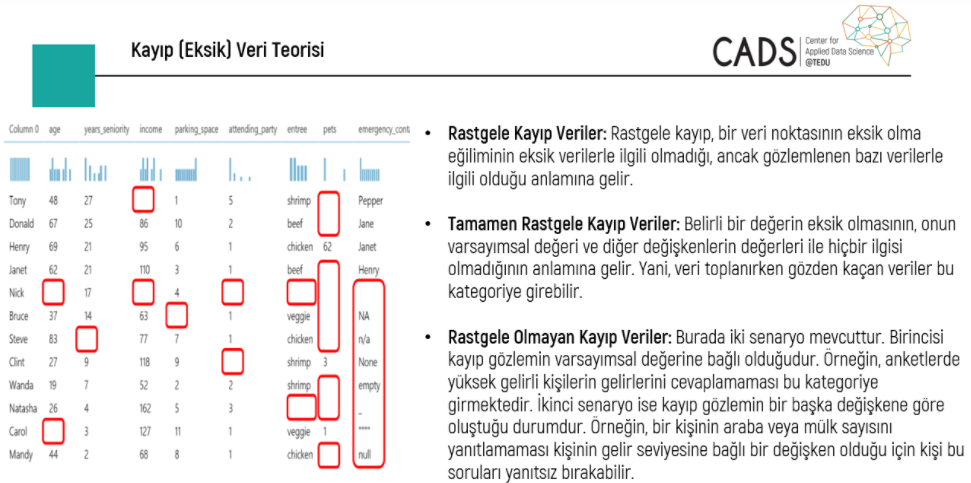

Kayıp verilerle alınabilecek bazı aksiyonlar ise şu şekildedir:

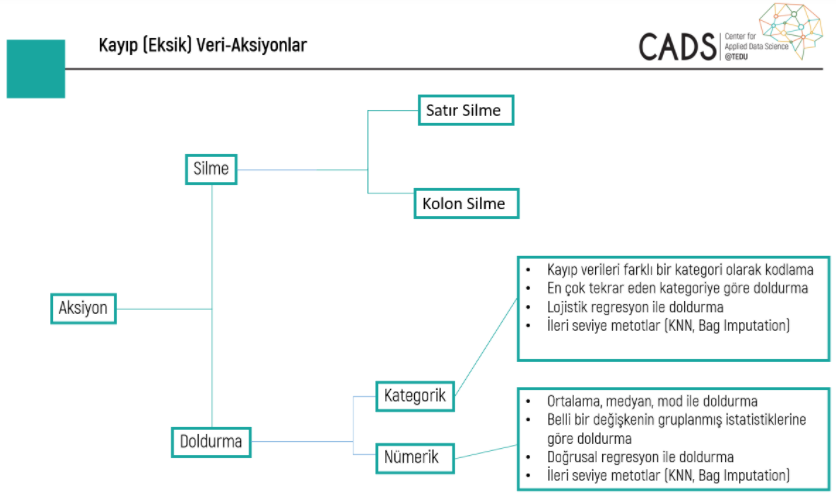

**Rastgele ve tamamen rastgele kayıp verilerde**, kayıp gözlem sıklığına göre **silme** işlemleri yapılabilir. **Rastgele olmayan kayıp verilerde** ise silme işlemi, kullanacağımız analizde yanlılığa yol açabilir dolayısıyla **doldurma** aksiyonu alınabilir.

Kayıp veriye sahip değişkenleri teker teker inceleyerek hangi aksiyonları alacağımıza karar verelim.

**Kandaki Glukoz Değerleri** <font color='green'><strong>(Glucose)</strong></font>

In [67]:
#Glukoz değişkenindeki kayıp veri sayısı
diyabet.Glucose.isna().sum()

5

**Glucose** değişkeninde kayıp veri sayısı veri setinin geneline oranla çok düşük olduğu için bu gözlemleri silebiliriz.

In [68]:
#Glukoz değişkeninde kayıp veriye sahip gözlemleri silelim
diyabet.dropna(subset=['Glucose'], inplace=True)

**Kan Basıncı Değerleri** <font color='green'><strong>(BloodPressure)</strong></font>

In [69]:
#Kan basıncı değişkenindeki kayıp veri sayısı
diyabet.BloodPressure.isna().sum()

35

**BloodPressure** değişkenindeki kayıp veri sayısı veri setinin yüzde 5'ine yakın bir oranda. Literatürde, veri setinin yüzde 5'ine kadar olan kayıp verilerin silinebileceği söylenir. Ancak bu oranda kayıp veriye sahip bütün değişkenlerdeki kayıp verilerin çoğunluğu farklı gözlemlerde yer alıyorsa bu durum, veri setinin büyük bir kısmını silmemiz anlamına gelebilir. 

Kan basıncı değişkeni için kayıp veri doldurma tekniklerini kullanalım. Öncelikle değişkenin dağılımını inceleyelim.

<AxesSubplot:>

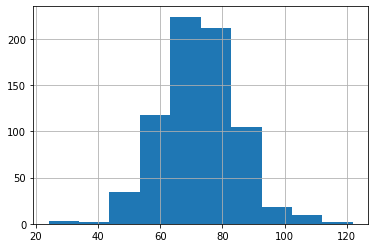

In [70]:
#Dağılım
diyabet.BloodPressure.hist()

**BloodPressure** değişkeni çarpık bir dağılıma sahip değil ve kayıp veri oranı da yüksek değil. Dolayısıyla, kayıp verileri ortalama kan basıncı değerleriyle doldurmak değişkenin varyansını çok etkilemeyecektir. 

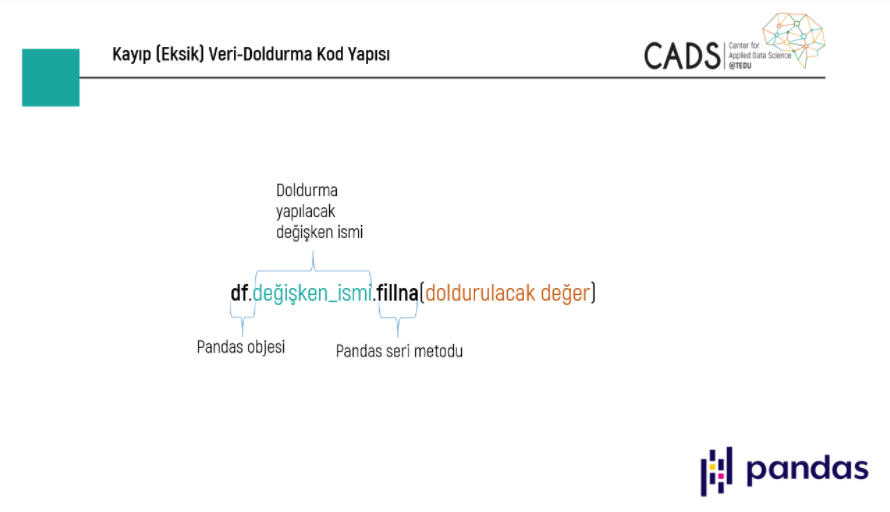

In [71]:
# Kan basıncı ortalaması
diyabet.BloodPressure.mean()

72.43818681318682

In [72]:
# Diyabet olup olmama durumuna göre kan basıncı ortalamaları
diyabet.groupby(['Outcome'])['BloodPressure'].mean()

Outcome
0    70.924686
1    75.332000
Name: BloodPressure, dtype: float64

In [73]:
# Diyabet olup olmama durumuna göre kan basıncı ortalamalarının sözlüğe dönüştürülmesi
kan_basinc = diyabet.groupby(['Outcome'])['BloodPressure'].mean().to_dict()

In [74]:
# Ortalama ile kayıp gözlem doldurulması
diyabet['BloodPressure'] = diyabet.BloodPressure.fillna(diyabet['Outcome'].map(kan_basinc))

# Kayıp veri kontrolü
diyabet.BloodPressure.isna().sum()

0

<AxesSubplot:>

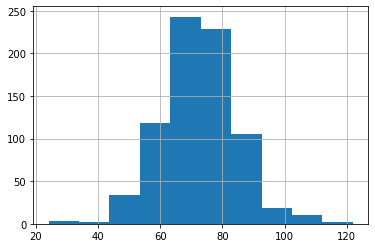

In [75]:
# Dağılım
diyabet.BloodPressure.hist()

**Deri Kalınlığı Değerleri** <font color='green'><strong>(SkinThickess)</strong></font>

In [76]:
# Deri kalınlığı değişkenindeki kayıp veri sayısı
diyabet.SkinThickness.isna().sum()

227

**SkinThickness** değişkeninde çok fazla kayıp veri var. Normalde, böyle durumlarda değişkeni veri setimizden silmeyi değerlendirebiliriz. Verinin toplanma sürecine erişimimiz varsa, bu değerlerin neden ölçülemediğini araştırarak süreci iyileştirebiliriz. Ancak, biz şu anda verinin toplanma süreciyle ilgili bir şeyi değiştiremeyiz ve değişkenlerimizin neredeyse hepsi diyabet hastalığı için çok önemli risk faktörlerini temsil ediyorlar. O yüzden değişkenin dağılımına bakarak ortalama ya da medyan değeriyle doldurma yoluna gidelim. 

<AxesSubplot:>

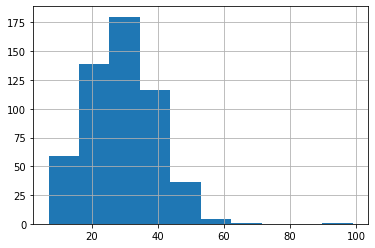

In [77]:
#Dağılım
diyabet.SkinThickness.hist()

Deri kalınlığı değişkeni birkaç aykırı değer haricinde çarpık bir dağılıma sahip gibi durmuyor. Hangi istatistiği kullanacağımız konusunda emin olmak için değişkenin özet istatistiklerine de bakabiliriz.

In [78]:
# Özet istatistikler
diyabet.SkinThickness.describe()

count    536.000000
mean      29.149254
std       10.494686
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

Histogramdan gördüğümüz gibi, değişken normale yakın bir dağılıma sahip. Kayıp verileri ortalama değeriyle doldurabiliriz.

In [79]:
# Diyabet olup olmama durumuna göre deri kalınlığı ortalamalarının sözlüğe dönüştürülmesi
deri_kalinlik = diyabet.groupby(['Outcome'])['SkinThickness'].mean().to_dict()
deri_kalinlik

{0: 27.25418994413408, 1: 32.96067415730337}

In [80]:
# Ortalama ile kayıp gözlem doldurulması
diyabet['SkinThickness'] = diyabet.SkinThickness.fillna(diyabet['Outcome'].map(deri_kalinlik))

# Kayıp veri kontrolü
diyabet.SkinThickness.isna().sum()

0

Değişkenin dağılımı nasıl değişti bakalım.

<AxesSubplot:>

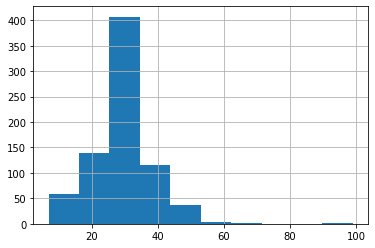

In [81]:
# Dağılım
diyabet.SkinThickness.hist()

Histogramdan gördüğümüz gibi, değişkenin neredeyse üçte birini ortalama değere eşitlemek dağılımı oldukça etkiledi. Fazla kayıp veri olması durumunda böyle yöntemler varyansı çok fazla düşüreceği için tercih edilmemelidir.

**İnsülin Değerleri** <font color='green'><strong>(Insulin)</strong></font>

In [82]:
# İnsülin değişkenindeki kayıp veri sayısı
diyabet.Insulin.isna().sum()

370

<AxesSubplot:>

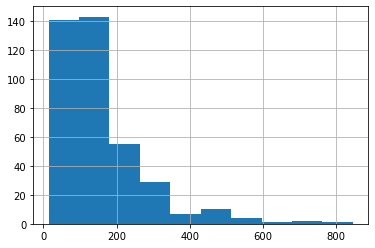

In [83]:
# Dağılım
diyabet.Insulin.hist()

**Insulin** değişkeni için de **SkinThickness** değişkeniyle ilgili çıkarımlarımız geçerli ancak analizlerimizin devamında yeterli sayıda gözleme ve değişkene sahip olabilmek için kayıp veri doldurma tekniklerini kullanacağız. Burada tek fark, insülin değişkeninin çarpık bir dağılıma sahip olmasıdır. O nedenle, kayıp verileri medyan değeri ile dolduracağız.

In [84]:
# Diyabet olup olmama durumuna göre insülin medyan değerlerinin sözlüğe dönüştürülmesi
insulin = diyabet.groupby(['Outcome'])['Insulin'].median().to_dict()
insulin

{0: 105.0, 1: 169.5}

In [85]:
# Medyan ile kayıp gözlem doldurulması
diyabet['Insulin'] = diyabet.Insulin.fillna(diyabet['Outcome'].map(insulin))

# Kayıp veri kontrolü
diyabet.Insulin.isna().sum()

0

<AxesSubplot:>

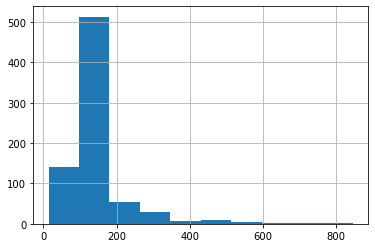

In [86]:
# Dağılım
diyabet.Insulin.hist()

**Vücut Kitle İndeksi (BMI) Değerleri** <font color='green'><strong>(BMI)</strong></font>

In [87]:
# BMI değişkenindeki kayıp veri sayısı
diyabet.BMI.isna().sum()

11

<AxesSubplot:>

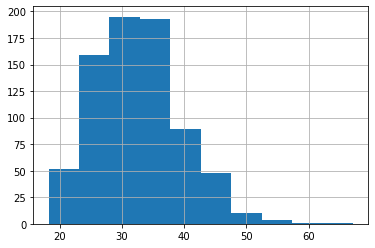

In [88]:
# Dağılım
diyabet.BMI.hist()

**BMI** değişkeni normale yakın bir dağılıma sahip olduğu için eksik verileri ortalama değerleriyle dolduralım.

In [89]:
# Diyabet olup olmama durumuna göre BMI ortalamalarının sözlüğe dönüştürülmesi
bmi = diyabet.groupby(['Outcome'])['BMI'].mean().to_dict()
bmi

{0: 30.87643442622951, 1: 35.3719696969697}

In [90]:
# Ortalama ile kayıp gözlem doldurulması
diyabet['BMI'] = diyabet.BMI.fillna(diyabet['Outcome'].map(bmi))

# Kayıp veri kontrolü
diyabet.BMI.isna().sum()

0

<AxesSubplot:>

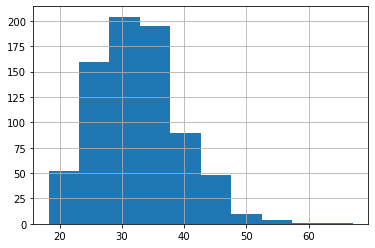

In [91]:
# Dağılım
diyabet['BMI'].hist()

Bu aşamada, keşifsel veri analizine nümerik ve kategorik değişkenleri ayrı ayrı inceleyerek devam edilebilir. Diyabet veri seti sadece nümerik değişkenlerden oluştuğu için, biz nümerik değişkenlerin analiziyle devam edeceğiz.

### Nümerik Değişkenler

Nümerik değişkenlerin dağılımını ve diyabet olup olmama durumuyla arasındaki ilişkileri keşfetmek için:

1. Histogram (Dağılım)
2. Kutu grafiği (Aykırı değer analizi)
3. Saçılım Grafiği (İlişki yönü ve gücü)
4. Korelasyon analizi
5. Nümerik değişken kategorikleştirme

gibi uygulamalar yapabiliriz. Her bir nümerik değişkenin dağılımını ve hedef değişkenle ilişkisini inceleyelim.

**Hamilelik sayısı diyabet olma riskini artırır mı? (Diyabet olma durumunu hamilelik sayısı etkiler mi?)** <font color='green'><strong>(Pregnancies)</strong></font>

Hamilelik sayısı **(Pregnancies)** değişkenin alabileceği değerleri düşündüğümüzde kesikli bir değişken olduğunu anlayabiliriz. Dolayısıyla, nümerik olarak işlenmiş olsa da aslında kategorik olarak ele alınması gereken bir değişkendir. Değişkeni kategorik hale getirdikten sonra sahip olduğu kategorileri ve sıklıkları inceleyelim.

In [92]:
# Diyabet değişkenini kategorik hale çevirelim 
diyabet.Pregnancies = diyabet.Pregnancies.astype('object')

In [93]:
# Sıklıklar
diyabet.Pregnancies.value_counts()

1     132
0     111
2     103
3      75
4      68
5      56
6      49
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Kategorilerin sıklıklarını incelediğimizde büyük farklılıklar görmekteyiz. Veri seti üzerinde yapay öğrenme modelleri uygulayacağımızda, az gözleme sahip kategoriler modelde yeterince temsil edilemeyebilir ya da aşırı öğrenmeye sebep olabilir.  Burada, sıklıkları düşük kategorileri birleştirip yeni bir kategori oluşturabilir, ya da bu kategorilerin bulunduğu satırları veri setimizden çıkartabiliriz. Veri silmek bilgi kaybına yol açacağı için, kategori birleştirmesi yapacağız.

Hamilelik sayısına göre diyabet olma ihtimallerini inceleyelim.

In [94]:
# Hamilelik sayısına göre diyabet olma ihtimali
diyabet.groupby('Pregnancies')['Outcome'].mean()

Pregnancies
0     0.342342
1     0.219697
2     0.184466
3     0.360000
4     0.338235
5     0.357143
6     0.306122
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

7. hamilelikten sonra diyabetli olma oranı artıyor gibi gözüküyor. 14, 15 ve 17 hamilelik geçiren kişiler ise ayrı bir kategori oluşturabilir gibi duruyor. Sıklık problemini çözmek adına '7-13 hamilelik' ve '14 ve üstü' şeklinde kategori birleştirmesi yapalım.

In [95]:
# Kategori birleştirme
diyabet['Pregnancies'].replace([7,8,9,10,11,12,13], '7-13', inplace = True)
diyabet['Pregnancies'].replace([14,15,17], '14veUstu', inplace = True)

Diyabet olup olmama durumu hamilelik değişkeninin kategorilerine göre nasıl değişiklik gösteriyor inceleyelim.

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

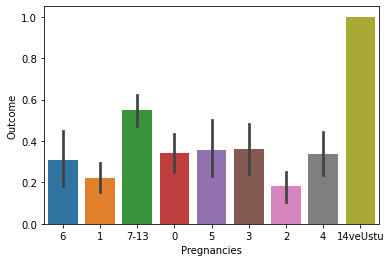

In [96]:
# Hamilelik sayısıyla diyabet olup olmama ilişkisi
sns.barplot(x = 'Pregnancies', y = 'Outcome', data = diyabet)

Yukarıdaki grafiğe baktığımızda, 7-13 arası ve 14veUstu gebelik sayısı kategorisinde yer alan kişilerin diyabet hastalığı ile karşılaşma riskleri diğer kategorilere göre daha yüksek görünüyor. 1 ve 2 gibi düşük hamilelik sayılarında riskin azaldığını da görebiliyoruz.

Çıkarım olarak diyabet olma durumu, hamilelik sayısına bağlıdır dedik. Ortaya böyle bir **hipotez** atmış olduk. Peki bu çıkarımımız **istatistiksel olarak anlamlı mı?**

Giriş eğitimimizde bahsedildiği üzere, iki kategorik değişken birbirine bağlı mı? sorusuna yanıt vermek için **ki-kare** testi yapıyoruz.

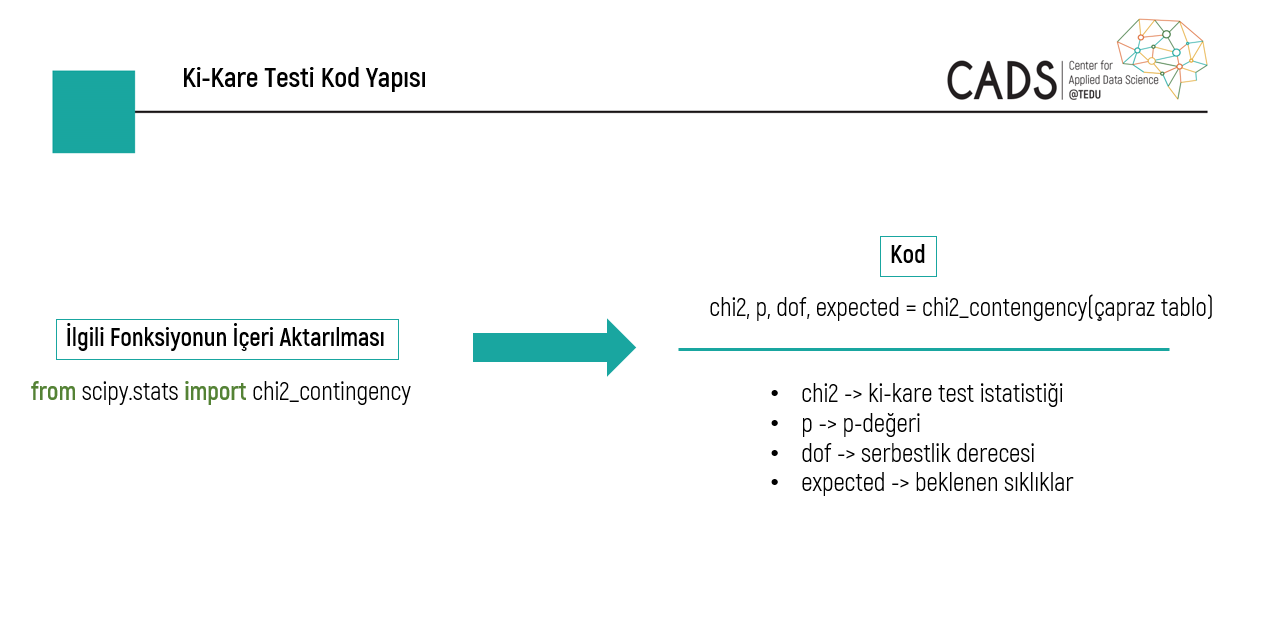

Ki-kare testi dokümantasyon: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [97]:
# Ki-kare testi fonksiyonu içeri aktarılması
from scipy.stats import chi2_contingency

In [98]:
#Çapraz tablo
pd.crosstab(diyabet['Pregnancies'], diyabet['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,103,29
2,84,19
3,48,27
4,45,23
5,36,20
6,34,15
14veUstu,0,4
7-13,74,91


In [99]:
# Ki-kare testi
chi2, p, dof, expected = chi2_contingency(pd.crosstab(diyabet['Pregnancies'], diyabet['Outcome']))

Hipotezlerimiz:

**H0: Diyabet olma durumu hamilelik sayısına bağlı değildir.**

**H1: Diyabet olma durumu hamilelik sayısına bağlıdır.**

Keşifsel veri analizi giriş eğitiminde **p-değerinden** bahsetmiştik. Burada ki-kare testi **p-değerimiz** 0.05'ten küçük çıkarsa H0'ı reddedeceğiz.

In [100]:
# p-değeri
print(p)

5.168880193577853e-10


In [101]:
# Test sonucu
if p>0.05:
    print(f'p-değeri = {p}, H0 kabul')
else:
    print(f'p-değeri = {p}, H0 red')

p-değeri = 5.168880193577853e-10, H0 red


**p-değerimiz** 0.05'ten oldukça küçük çıktı. Dolayısıyla H0 hipotezini reddedip, diyabet olma durumunun hamilelik sayısına bağlı olduğunu **istatistiksel olarak anlamlı** buluyoruz. **Pregnancies** değişkeni kuracağımız modeller için önemli bir değişken olabilir.

**Glukoz değerleri diyabet olma durumunu etkiliyor mu?** <font color='green'><strong>(Glucose)</strong></font>

<AxesSubplot:ylabel='Glucose'>

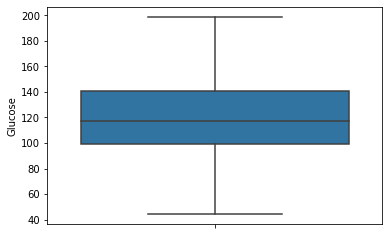

In [102]:
# Glukoz değişkeni dağılımı
sns.boxplot(y = diyabet['Glucose'])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

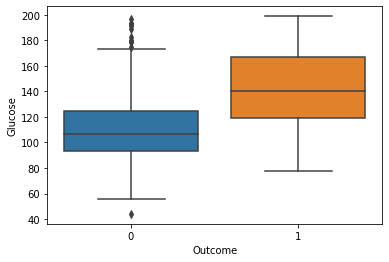

In [103]:
# Kandaki glukoz değeriyle diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'Glucose', data = diyabet)

Diyabetli kişilerde glukoz miktarı çok daha yüksek gibi duruyor. Yapay öğrenme algoritmaları için önemli bir değişken olabilir.

**Kan basıncı değerleri diyabet olma durumunu etkiliyor mu?** <font color='green'><strong>(BloodPressure)</strong></font>

<AxesSubplot:ylabel='BloodPressure'>

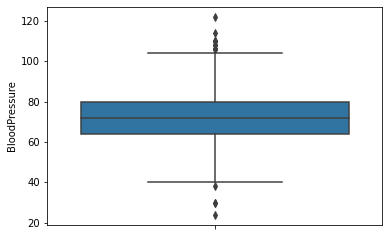

In [104]:
# Kan basıncı değişkeni dağılımı
sns.boxplot(y = diyabet['BloodPressure'])

**BloodPressure** değişkeni çarpık dağılmasa da aykırı değerlere sahip olduğunu görüyoruz. Aykırı değerlerin bazı yapay öğrenme modellerini olumsuz etkileyebileceğinden bahsetmiştik. Aykırı değerler konusunda neler yapabileceğimizi inceleyelim.

### Aykırı Değer Analizi

Aykırı değerlerin analizleri ve özellikle lineer modellerle birlikte yapay sinir ağları modellerini de etkileyebileceğinden giriş eğitimimizde bahsetmiştik. Aykırı değerler yanlış veri girişlerinden kaynaklanabilir, bu durumda satır bazlı silme işlemi ya da veriyi toplayan kişilere danışmak mantıklı olacaktır. Ya da gerçekten aykırı değer olabilir, bunun için de:

**1. Veri setinden çıkarma**

**2. Çok aykırı değer varsa veriyi kategorikleştirme**

**3. Yakın bir değere yakınsama**

işlemleri yapılabilir. Aykırı değerlerle ilgili alacağınız aksiyon analizinize bağlı olarak değişecektir. Örneğin **ağaç** tabanlı yapay öğrenme modelleri aykırı değerlere duyarlı değildir. Dolayısıyla burada herhangi bir aksiyon almanıza gerek yoktur. Ama **lineer** tabanlı yapay öğrenme modelleri aykırı değerlere duyarlı olup, sonuçları etkilemektedir. Bu analizimizde lojistik regresyon ile keşifsel veri analizi yapacağımız için aykırı değerlere dikkat edeceğiz.

Aykırı değer tespit mekanizmasını tekrar hatırlayalım.

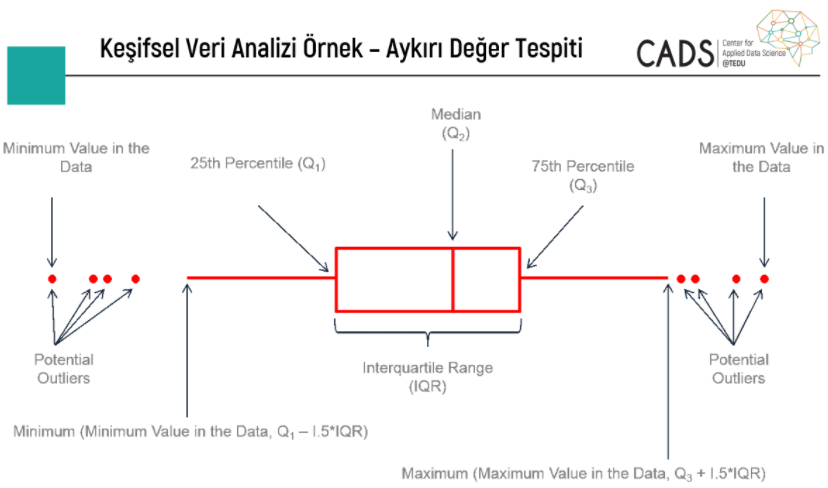

Kan basıncı değişkeni için minimum ve maksimum sınırlardan düşük ve yüksek değerleri inceleyelim:

In [105]:
# Özet istatistikler
diyabet.BloodPressure.describe()

count    763.000000
mean      72.461181
std       12.107910
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [106]:
# Aykırı değerler
# Interquantile range
IQR = 80.000000 - 64.000000
print(IQR)
# %75lik değer (Q3)
q3 = 80.000000
# Maksimum sınır
maks = q3 + (1.5*IQR)
print(maks)
# %25lik değer (Q1)
q1 = 64.000000
# Minimum sınır
minimum = q1 - (1.5*IQR)
print(minimum)

16.0
104.0
40.0


104'ten yüksek, 40'tan düşük değerleri inceleyelim.

In [107]:
# Aykırı değerler
diyabet[(diyabet['BloodPressure'] > 104) | (diyabet['BloodPressure'] < 40)].BloodPressure.describe()

count     14.000000
mean      87.285714
std       37.593839
min       24.000000
25%       55.000000
50%      107.000000
75%      110.000000
max      122.000000
Name: BloodPressure, dtype: float64

Toplam 14 aykırı değer mevcut. Kan basıncından bahsettiğimiz için bu değerler yanlış girilmemiş olabilir. Dolayısıyla bilgi kaybı olmaması için bu değerleri belli bir aralıkta tutacağız. Peki bu aralık nasıl belirleniyor?

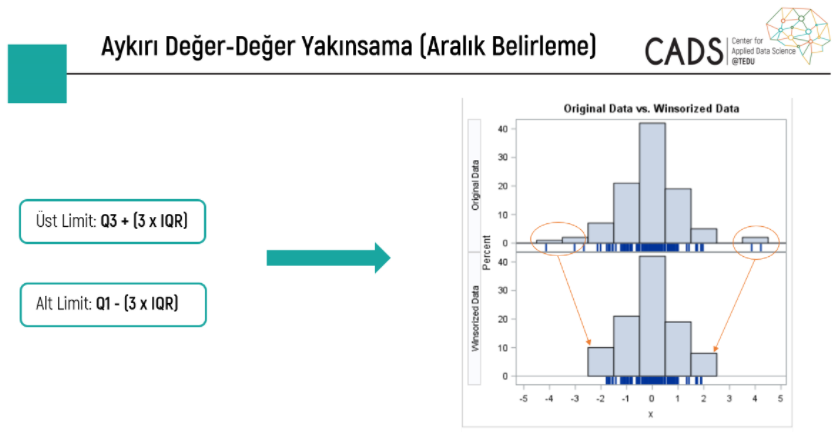

Üst limit üzerinde kalan değerlere yeni üst limit değerini atayacağız. Alt limitin altında kalan değerlere ise yeni alt limit değerini atayacağız.

In [108]:
# Üst sınır
maks = q3 + (3*IQR)
print(maks)
# Alt sınır
minimum = q1 - (3*IQR)
print(minimum)

128.0
16.0


Dolayısıyla üst limit dışında **(104)** kalan aykırı değerlere **128**, alt limit altında kalan **(40)** aykırı değerlere  **16** değerini atayacağız. 

In [109]:
# Değer yakınsama (Aralık belirleme)
diyabet.loc[diyabet['BloodPressure'] > 104,'BloodPressure'] = 128
diyabet.loc[diyabet['BloodPressure'] < 40, 'BloodPressure'] = 16

Şimdi kutu grafiğimizi tekrar çizdirelim.

<AxesSubplot:ylabel='BloodPressure'>

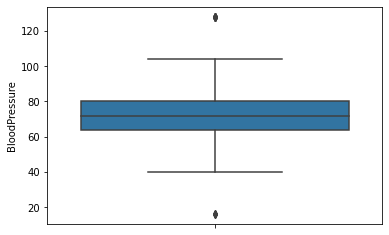

In [110]:
# Kan basıncı değişkeni dağılımı
sns.boxplot(y = diyabet['BloodPressure'])

Daha normal dağılan bir değişken elde etmiş olduk. Bu, durum lineer model performansını da arttıracaktır. Diyabet olma durumu ile arasındaki ilişkiyi inceleyelim.

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

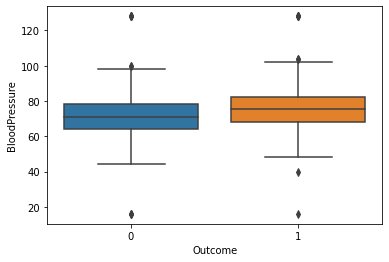

In [111]:
# Kan basıncı değeriyle diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = diyabet)

Grafiğe göre kan basıncının diyabetli hastalarda, diyabet olmayan hastalara göre bir miktar daha yüksek olduğu çıkarımını yapabiliriz. Bu çıkarımımız **istatistiksel olarak anlamlı mı**?

Bu durumda hipotezimiz, kan basıncının diyabet olma durumunu etkilediği yönünde olacaktır. 2 kategorimiz olduğu için **(0 ve 1)**:

- Eğer kan basıncı değerleri kategoriler içinde **normal dağılıyorsa** parametrik olan **t-test**
- Eğer kan basıncı değerleri **normal dağılmıyorsa** parametrik olmayan **Mann-Whitney U test** 

ile istatistiksel anlamlılığı test edebiliriz.

**Normallik Testi**

Normallik testi için **Shapiro-Wilk** testi kullanacağız.

In [112]:
# Shapiro testinin içeri aktarılması
from scipy.stats import shapiro

Normallik testi hipotezleri:

**H0: Kan basıncı değerleri dağılımının, normal dağılımdan farkı yoktur.**

**H1: Kan basıncı değerleri dağılımının, normal dağılımdan farkı vardır.**

In [113]:
# Normallik testi
# Diyabet olanların, kan basıncı dağılım testi
print(shapiro(diyabet[diyabet['Outcome']==1]['BloodPressure'])[1])
# Diyabet olmayanların, kan basıncı dağılım testi
print(shapiro(diyabet[diyabet['Outcome']==0]['BloodPressure'])[1])

1.9839800635690352e-10
5.96038138549887e-13


**p-değerleri** 0.05'ten küçük çıktığı için H0 hipotezini reddediyoruz. Dolayısıyla kan basıncı değerlerinin normal dağılmadığını söyleyebiliriz. P-değerlerinden herhangi birinin 0.05'ten küçük çıkması **parametrik olmayan** test olan **Mann-Whitney U test** yapmamız gerektiği anlamına gelecektir.

In [114]:
# Mann-Whitney U testinin içeri aktarılması
from scipy.stats import mannwhitneyu

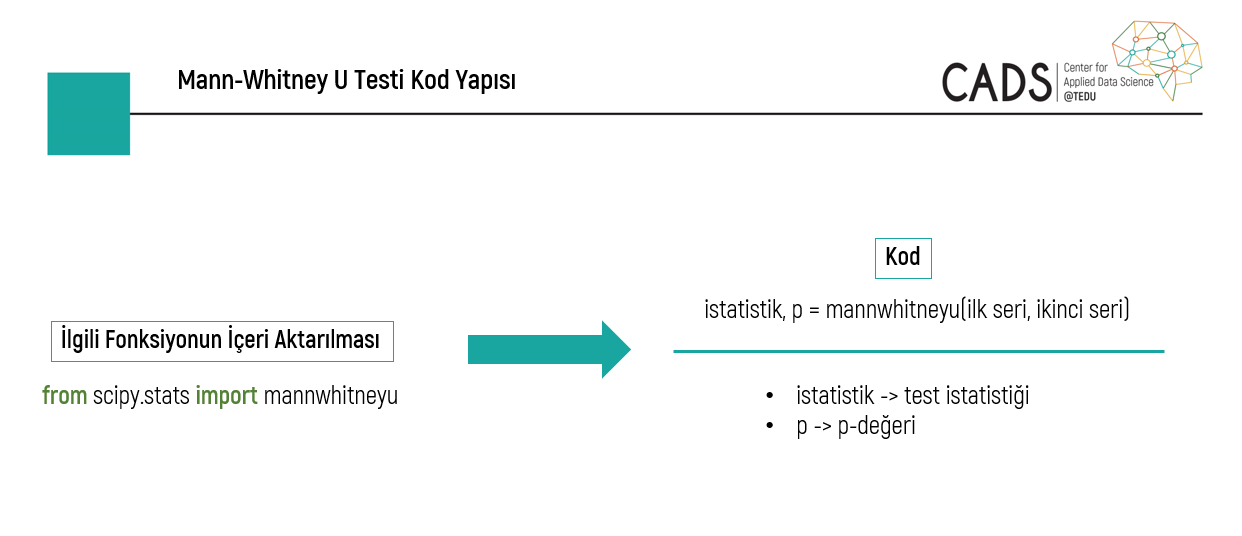

**H0: Kan basıncı ortancaları bakımından diyabet olma durumları arasında fark yoktur.**

**H1: Kan basıncı ortancaları bakımından diyabet olma durumları arasında fark vardır.**

In [115]:
# Mann-Whitney U Test
istatistik, p = mannwhitneyu(diyabet[diyabet['Outcome']==1]['BloodPressure'], diyabet[diyabet['Outcome']==0]['BloodPressure'])

In [116]:
# Test sonucu
if p > 0.05:
    print(f'p-değeri: {p} H0 kabul')
else:
    print(f'p-değeri: {p} H0 red')

p-değeri: 3.726861283491648e-07 H0 red


**p-değerimiz** 0.05'ten oldukça küçük çıktı. Dolayısıyla H0 hipotezini reddedip, diyabet olma durumunun kan basıncı değerine bağlı olduğunu **istatistiksel olarak anlamlı** buluyoruz. **BloodPressure** değişkenini de kuracağımız modellere dahil edebiliriz.

**Deri kalınlığı değerleri diyabet olma durumunu etkiler mi?** <font color='green'><strong>(SkinThickness)</strong></font>

<AxesSubplot:ylabel='SkinThickness'>

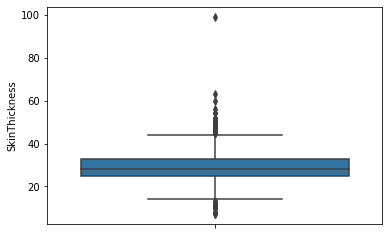

In [117]:
# Deri kalınlığı değişkeni dağılımı
sns.boxplot(y = diyabet['SkinThickness'])

**SkinThickness** değişkeninin sağa çarpık ve hem yüksek hem düşük değerlerde aykırı değerlere sahip olduğunu görüyoruz. Dolayısıyla yine aykırı değerlere sınırlar içerisinde bir değer atama işlemi yapacağız. Fakat bu sefer bir kütüphane yardımı ile bu işlemi gerçekleştireceğiz.

In [120]:
# İlgili fonksiyonu içeri aktaralım
#!pip install feature_engine
from feature_engine import outliers as outr

Yakınsama yöntemi (**capping_method**) olarak 'gaussian', 'iqr' ya da 'quantile' uygulayabiliriz. Hem üst hem de alt değerlerin hepsini belli bir sınır içinde tutmak istiyorsak **tail** = 'both', sadece üst sınırdaki aykırı değerler için 'right', sadece alt sınırdaki aykırı değerler için 'left' olarak kullanmamız gerekiyor. **variables** argümanına ise aykırı değer yakınsaması yapmak istediğimiz değişkenleri liste şeklinde girebiliriz.

In [121]:
# feature_engine objesi oluşturma
capper = outr.Winsorizer(capping_method = 'iqr', tail = 'both', variables = ['SkinThickness'])

In [122]:
# Objeyi çalıştırma
capper.fit(diyabet)

Winsorizer(capping_method='iqr', tail='both', variables=['SkinThickness'])

In [123]:
# İlgili işlemleri yapıp tekrar veri setine atama
diyabet = capper.transform(diyabet)

Kutu grafiğimizi tekrar çizdirelim.

<AxesSubplot:ylabel='SkinThickness'>

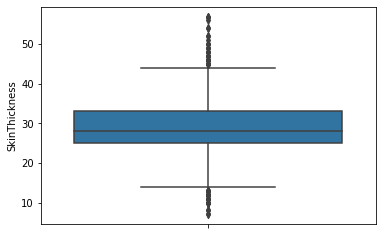

In [124]:
# Deri kalınlığı değişkeni dağılımı
sns.boxplot(y = diyabet['SkinThickness'])

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

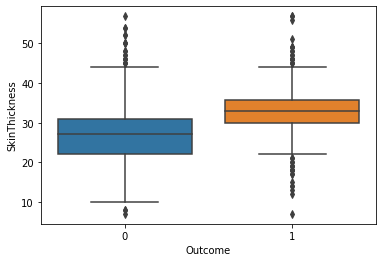

In [125]:
# Deri kalınlığı değeriyle diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = diyabet)

Deri kalınlığı, diyabet olup olmama durumunu etkiliyor gibi duruyor. İstatistiksel test ile bu hipotezimizin anlamlılığını test edelim. Parametrik bir test kullabilir miyiz?

**Normallik Testi**

Normallik testi hipotezleri:

**H0: Deri kalınlığı değerleri dağılımının, normal dağılımdan farkı yoktur.**

**H1: Deri kalınlığı değerleri dağılımının, normal dağılımdan farkı vardır.**

In [126]:
# Normallik testi
# Diyabet olanların, kan basıncı dağılım testi
print(shapiro(diyabet[diyabet['Outcome']==1]['SkinThickness'])[1])
# Diyabet olmayanların, kan basıncı dağılım testi
print(shapiro(diyabet[diyabet['Outcome']==0]['SkinThickness'])[1])

3.858443342608098e-09
8.566176240565326e-11


**p-değerleri** 0.05'ten küçük çıktığı için H0 hipotezini reddediyoruz. Deri kalınlığı değerlerinin normal dağılmadığını söyleyebiliriz. Dolayısıyla, **parametrik olmayan Mann-Whitney U test** yapacağız.

**H0: Deri kalınlığı ortancaları bakımından diyabet olma durumları arasında fark yoktur.**

**H1: Deri kalınlığı ortancaları bakımından diyabet olma durumları arasında fark vardır.**

In [127]:
# Mann-Whitney U Test
istatistik, p = mannwhitneyu(diyabet[diyabet['Outcome']==1]['SkinThickness'], diyabet[diyabet['Outcome']==0]['SkinThickness'])

In [128]:
# Test sonucu
if p > 0.05:
    print(f'p-değeri: {p} H0 kabul')
else:
    print(f'p-değeri: {p} H0 red')

p-değeri: 3.6047552845307235e-23 H0 red


**p-değerimiz** 0.05'ten küçük çıktı. Dolayısıyla H0 hipotezini reddedip, diyabet olma durumunun deri kalınlığı değerine bağlı olduğunu söyleyebiliriz. **SkinThickness** değişkenini kuracağımız modellerde kullanabiliriz.

**İnsülin değeri diyabet olma durumunu etkiler mi?** <font color='green'><strong>(Insulin)</strong></font>

<AxesSubplot:ylabel='Insulin'>

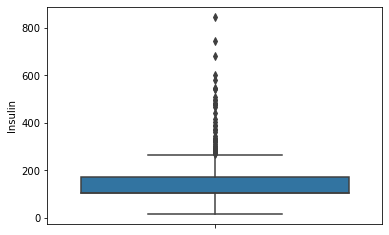

In [129]:
#İnsülin değişkeni dağılımı
sns.boxplot(y = diyabet['Insulin'])

Aykırı değerler için değer yakınsama yapalım.

In [130]:
# feature_engine objesi oluşturma
capper = outr.Winsorizer(capping_method = 'iqr', tail = 'both', variables = ['Insulin'])

In [131]:
# Objeyi çalıştırma
capper.fit(diyabet)

Winsorizer(capping_method='iqr', tail='both', variables=['Insulin'])

In [132]:
# İlgili işlemleri yapıp tekrar veri setine atama
diyabet = capper.transform(diyabet)

<AxesSubplot:ylabel='Insulin'>

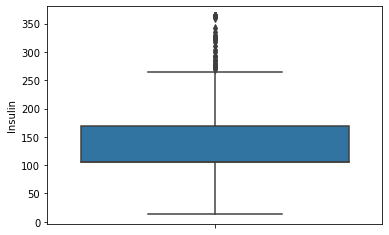

In [133]:
# İnsülin değişkeni dağılımı
sns.boxplot(y = diyabet['Insulin'])

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

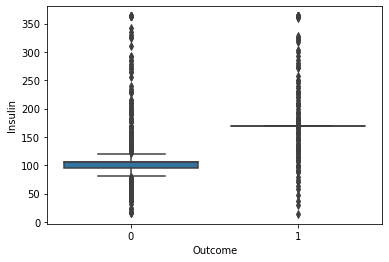

In [134]:
# Kandaki insülin değeriyle diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'Insulin', data = diyabet)

**Insulin** değişkeni de önemli bir değişken olabilir.

**Vücut Kitle İndeksi (BMI) diyabet olma durumunu etkiler mi?** <font color='green'><strong>(BMI)</strong></font>

<AxesSubplot:ylabel='BMI'>

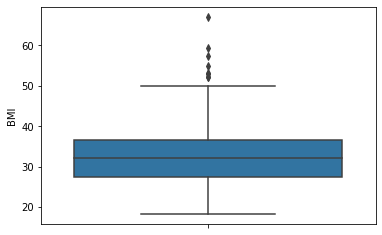

In [135]:
# BMI değişkeni dağılımı
sns.boxplot(y = diyabet['BMI'])

In [136]:
# feature_engine objesi oluşturma
capper = outr.Winsorizer(capping_method = 'iqr', tail = 'both', variables = ['BMI'])

In [137]:
# Veri setine fit ederek transform etme
diyabet = capper.fit_transform(diyabet)

<AxesSubplot:ylabel='BMI'>

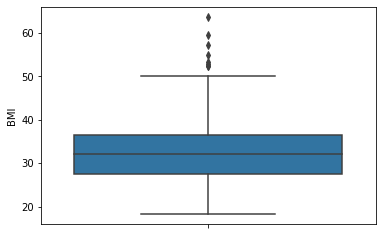

In [138]:
# BMI değişkeni dağılımı
sns.boxplot(y = diyabet['BMI'])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

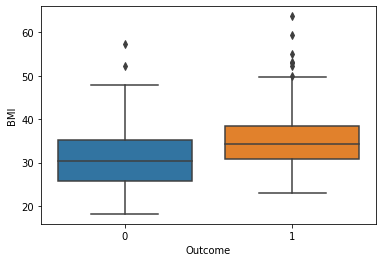

In [139]:
# BMI değeriyle diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'BMI', data = diyabet)

**BMI** değişkenini de modellere dahil edebiliriz.

**Diyabet köken fonksiyonu değeri diyabet olma durumunu etkiler mi?** <font color='green'><strong>(DiabetesPedigreeFunction)</strong></font>

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

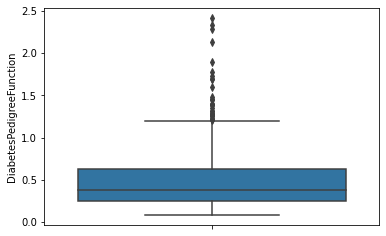

In [140]:
# Diyabet Köken Fonksiyonu değişkeni dağılımı
sns.boxplot(y = diyabet['DiabetesPedigreeFunction'])

In [141]:
# Aykırı değer yakınsama
capper = outr.Winsorizer(capping_method = 'iqr', tail = 'right', variables = ['DiabetesPedigreeFunction'])
diyabet = capper.fit_transform(diyabet)

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

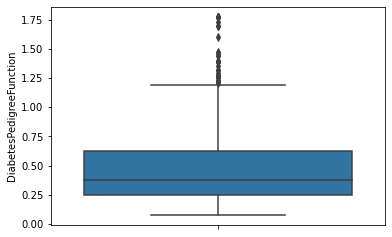

In [142]:
# Diyabet Köken Fonksiyonu değişkeni dağılımı
sns.boxplot(y = diyabet['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

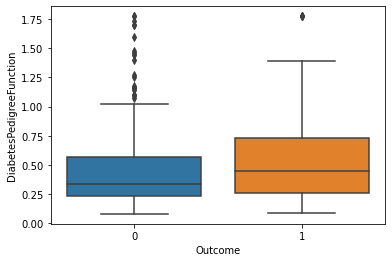

In [143]:
# Diyabet Köken Fonksiyonu değeriyle diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = diyabet)

Diyabet köken fonksiyonu değeri de önemli bir değişken gibi duruyor.

**Yaş** <font color='green'><strong>(Age)</strong></font>

<AxesSubplot:ylabel='Age'>

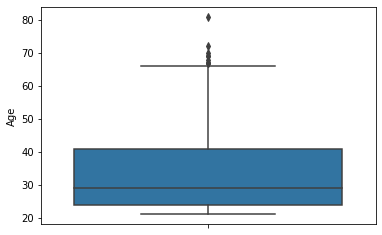

In [144]:
# Yaş değişkeni dağılımı
sns.boxplot(y = diyabet['Age'])

In [145]:
# Aykırı değer yakınsama
capper = outr.Winsorizer(capping_method = 'iqr', tail = 'right', variables = ['Age'])
diyabet = capper.fit_transform(diyabet)

<AxesSubplot:ylabel='Age'>

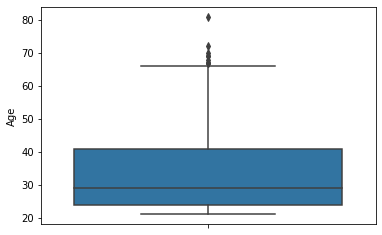

In [146]:
# Yaş değişkeni dağılımı
sns.boxplot(y = diyabet['Age'])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

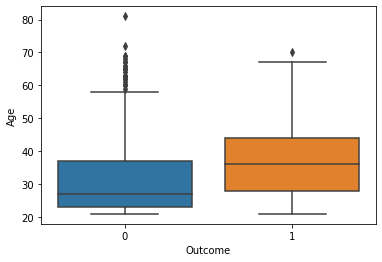

In [147]:
# Yaşla diyabet olup olmama ilişkisi
sns.boxplot(x = 'Outcome', y = 'Age', data = diyabet)

Değişkenleri teker teker inceledik, tüm değişkenlerimiz diyabet olup olmama durumunu etkileyebilir. Son olarak, nümerik değişkenlerin birbirleriyle olan ilişkilerini inceleyelim.

Öncelikle **Korelasyon (İlişki)** kavramını inceleyelim.

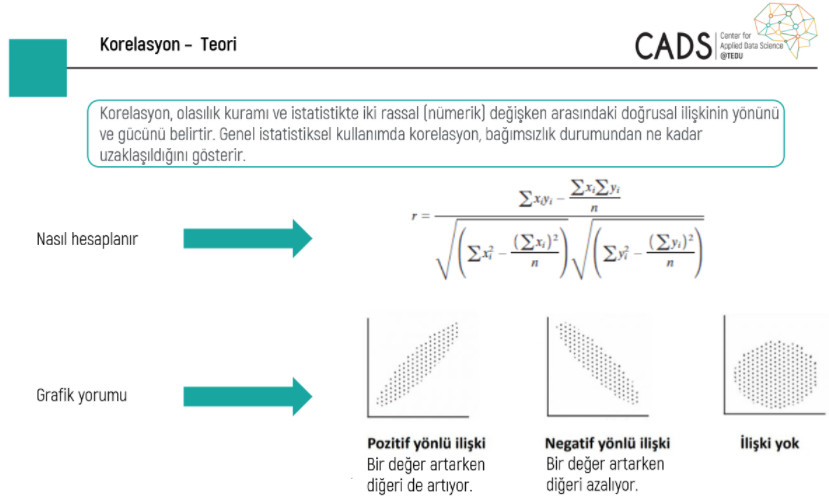

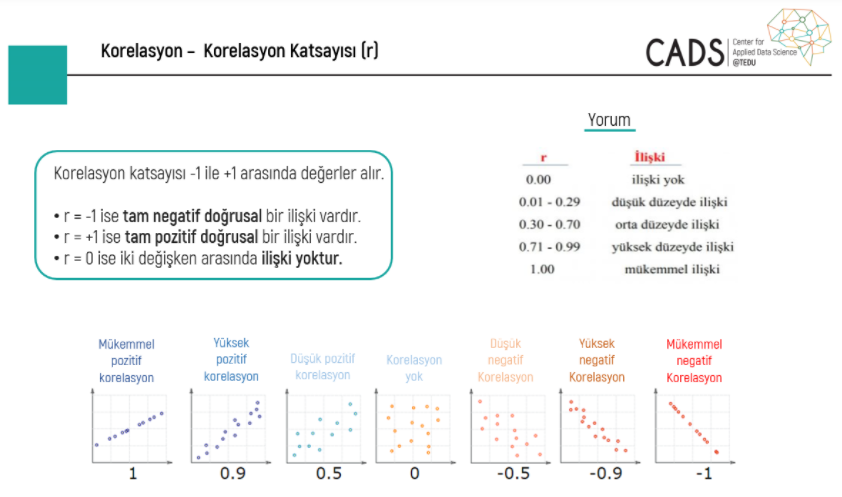

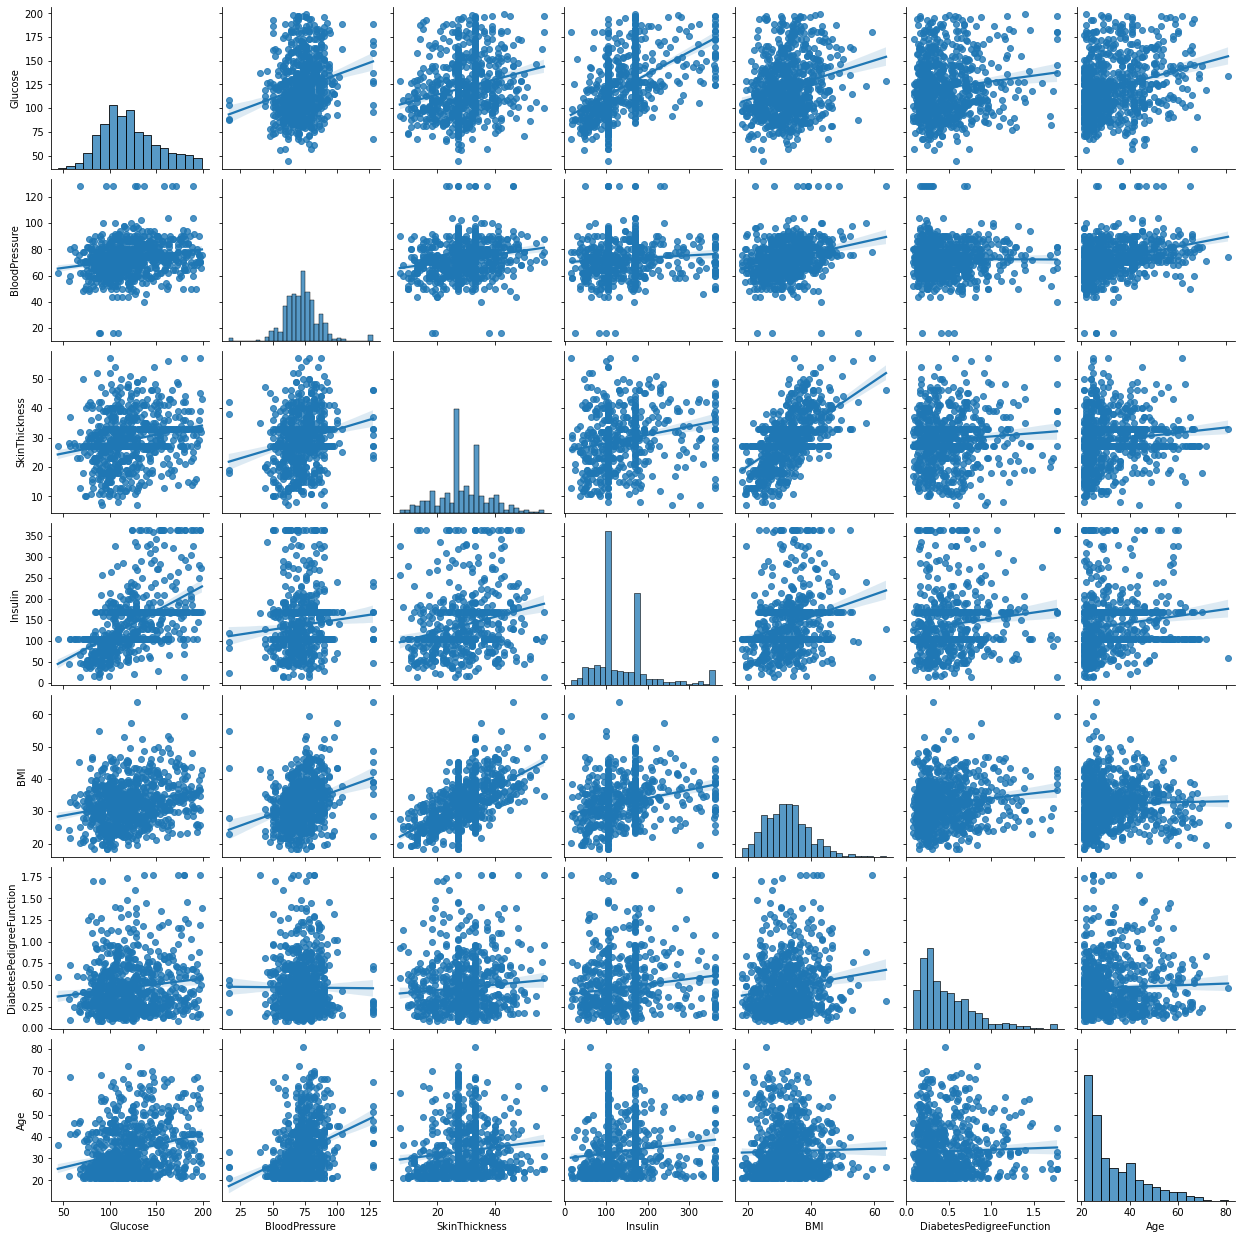

In [148]:
# Çoklu grafik
sns.pairplot(diyabet[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], kind = 'reg')

Diyagonal olarak değişkenlerin histogram grafiği ile dağılımını görebiliyoruz. Diğer grafiklerde ise değişkenlerin birbirleriyle olan ilişkilerini saçılım grafiği ile görebiliyoruz. Yukarıdaki grafiğe göre:

1. Vücut kitle indeksi **(BMI)** değişkeni ile deri kalınlığı **(SkinThickness)** değişkeni arasında orta seviyeli pozitif bir ilişki olduğu
2. **Insulin** değişkeni ile **Glucose** değişkeni arasında orta seviyeli pozitif bir ilişki olduğu
4. Yaş **(Age)** değişkeni ile kan basıncı **(BloodPressure)** değişkeni arasında düşük pozitif bir ilişki olduğu 

sonuçlarına varılabilir.

İlişkilerin korelasyon katsayılarını görselleştirelim.

<AxesSubplot:>

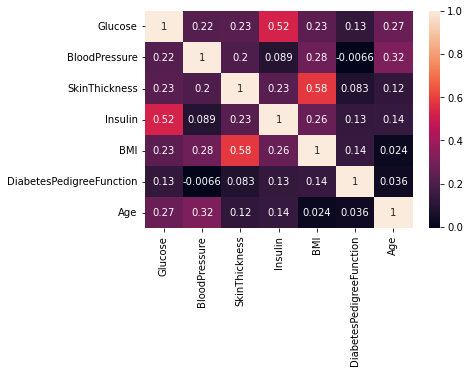

In [149]:
# Isı haritası
sns.heatmap(diyabet[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].corr(), annot=True)

Nümerik değişkenler arasında çok yüksek korelasyonlar mevcut değil. Lineer modeller için çok büyük bir sorun oluşmayacaktır. 

Lojistik regresyon modeline geçmeden önce yaptığımız görselleştirmeler ve testlerle bütün değişkenlerin hedef değişkeni etkileyebileceğini gördük. Lojistik resgresyon modeline göre hangi değişkenlerin önemli tahmin edici değişkenler olacağına bakalım.

## Genel Lojistik Regresyon Modeli

Bazı durumları ve desenleri insan gözüyle göremeyip kaçırmış olabiliriz. Dolayısıyla, devreye basit yapay öğrenme modellerinden biri olan **Lojistik Regresyon** giriyor.

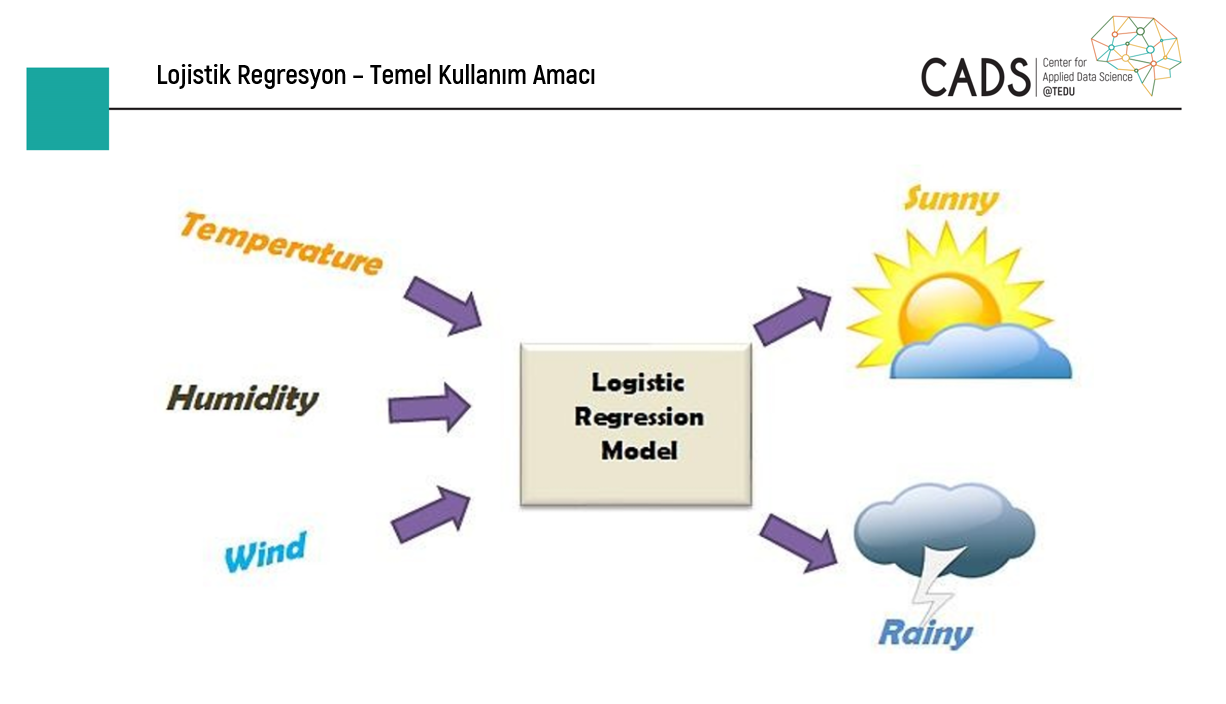

Lojistik regresyonun **temel amacı** bağımsız değişkenlerle (tahmin edici değişkenler, faktörler, etkileyiciler), bir bağımlı değişkenin kategorilerini **tahmin** etmektir. Yukarıdaki örnekteki gibi sıcaklık, nem, rüzgar ve hava durumu (güneşli, yağmurlu) değişkenlerinden oluşan bir veri setimiz var farz edelim. **Sıcaklığı, nemi ve rüzgar ölçüm değerlerini** kullanarak **hava durumunu tahmin edebiliriz**.

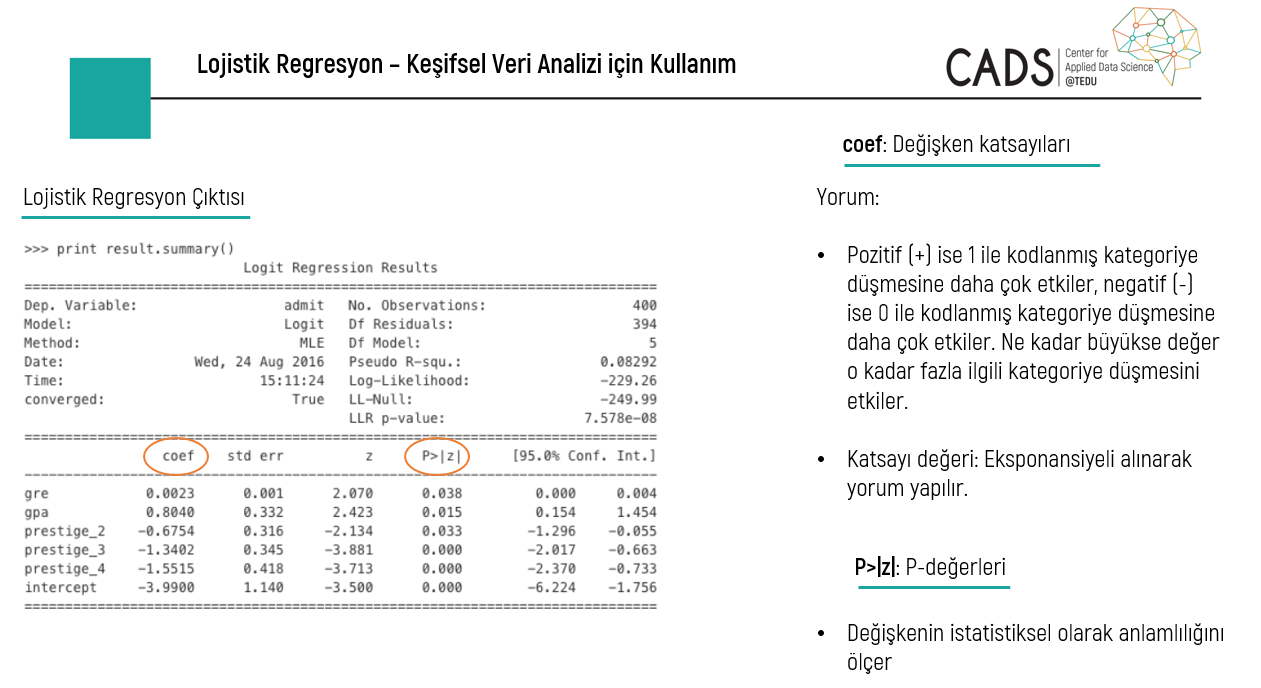

**Model çıktısı katsayı (coef) yorumları:**

- **Intercept**: Model sabiti, yukarıdaki örneği yorumlayacak olursak, **gre** puanı 0, **gpa** 0, mezun olduğu lisenin **prestij kategorisi** 1 olan kişinin ilgili üniversiteye kabul edilme logaritmik ihtimali -3.9900'dır. Eğer bu değerin eksponansiyelini alırsak (math.exp(-3.9900)) 0.01 elde edeceğiz. Bu da bize diğer tüm öğrencilere göre bu öğrencinin okula kabul şansının çok az olduğunu göstermektedir.



- **Nümerik katsayı yorumu:** **gpa** için diğer değişkenler sabit bir değer aldığında, **gpa** puanı bir birim fazla olan öğrencinin okula kabul edilmesi (math.exp(0.8040)) 2.234 kat daha fazladır. Yani, **gpa** puanını bir birim artarsa okula kabul edilme ihtimali %123.4 daha fazladır. Bu durum düşününce mantıklıdır. Akademik ortalaması 3/4 olan bir kişinin 2/4 olan bir kişiye göre okula kabul edilme durumu daha fazladır.


- **Kategorik katsayı yorumu:** Mezun olduğu okulun **prestijlik seviyesi 4** olan bir liseden mezun olan öğrencinin, **prestijlik seviyesi 1** olan öğrenciye göre okula kabul edilmesi (math.exp(-1.5515)) 0.21 kat daha fazladır. Demek mantıksız olduğu için bu değerin tersi alındığında **1/0.21 = 4.7**, okula kabul edilmemesi 4.7 kat daha fazladır dememiz gerekiyor.

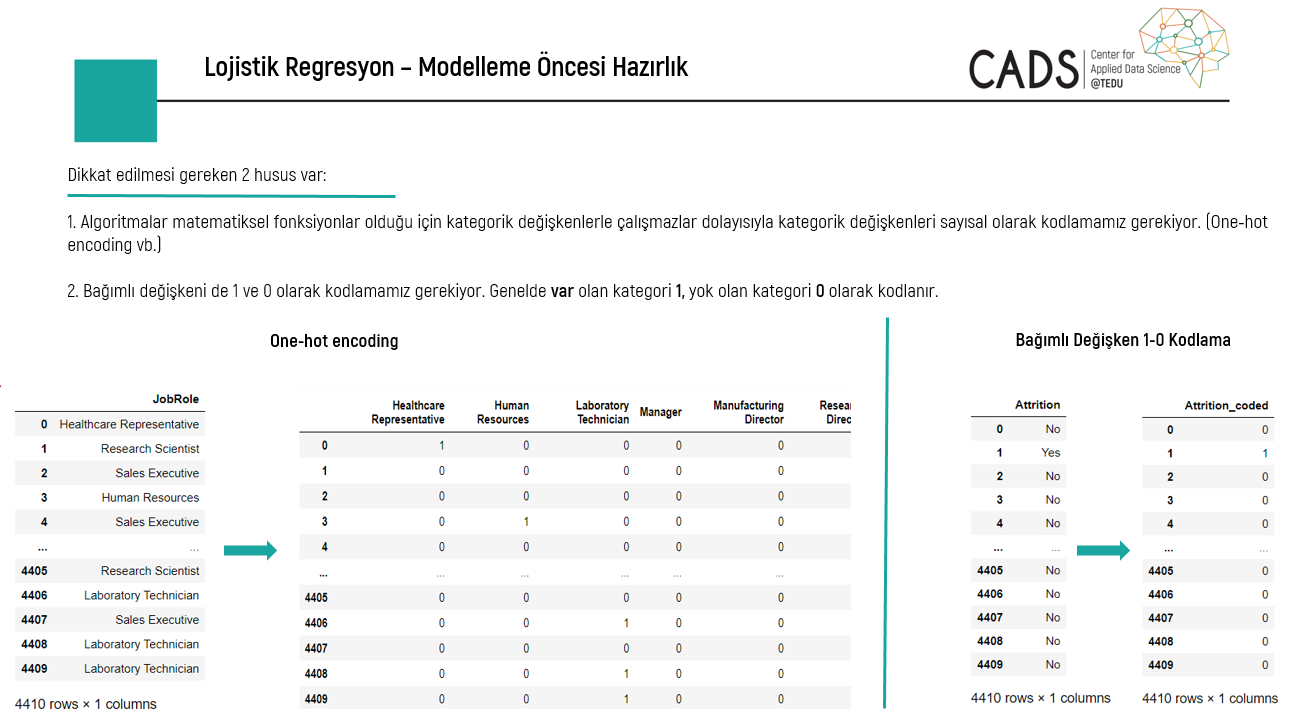

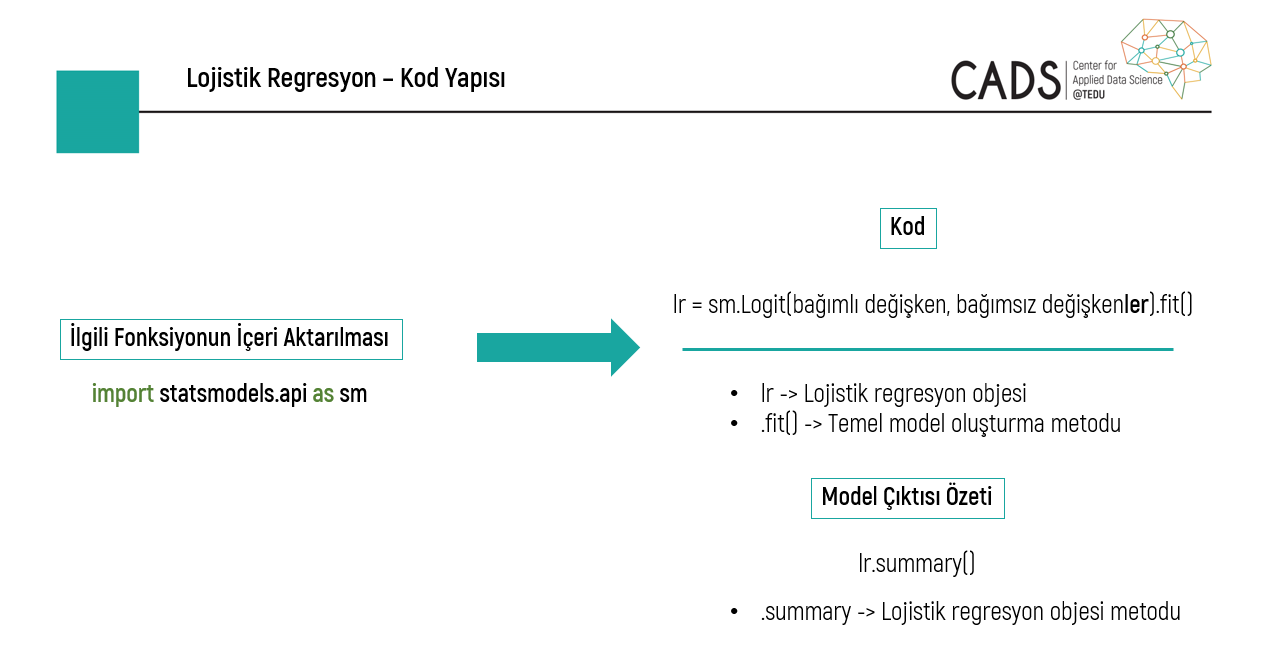

In [150]:
# İlgili kütüphaneyi içeri aktaralım
import statsmodels.api as sm

Peki, modele hangi değişkenleri dahil edeceğiz? Burada, keşifsel veri analizi sonucunda diyabet olma durumunu etkileyebileceğini düşündüğümüz değişkenlerle birlikte, alan bilgisine sahip birine danışıp ya da bireysel araştırmamız sonucunda da etkili olabilecek değişkenleri de ekleyebililriz.

Yaptığımız görselleştirmeler ve istatistiksel testler sonuncunda, bütün değişkenler diyabet olma durumunu etkliyor gibi gözüküyor. Bu yüzden, veri setindeki bütün değişkenleri modele dahil edeceğiz.

In [151]:
# Tahmin edilen
tahmin = diyabet[['Outcome']]

In [152]:
# Seçilen değişkenler
secilen = diyabet[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

Kategorik **Pregnancies** değişkenini one-hot encoding ile sayısallaştıralım.

In [153]:
# One-hot encoding
tahmin_ediciler = pd.get_dummies(secilen, drop_first=True)

In [154]:
# Kontrol edelim
tahmin_ediciler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   763 non-null    float64
 1   BloodPressure             763 non-null    float64
 2   SkinThickness             763 non-null    float64
 3   Insulin                   763 non-null    float64
 4   BMI                       763 non-null    float64
 5   DiabetesPedigreeFunction  763 non-null    float64
 6   Age                       763 non-null    float64
 7   Pregnancies_1             763 non-null    uint8  
 8   Pregnancies_2             763 non-null    uint8  
 9   Pregnancies_3             763 non-null    uint8  
 10  Pregnancies_4             763 non-null    uint8  
 11  Pregnancies_5             763 non-null    uint8  
 12  Pregnancies_6             763 non-null    uint8  
 13  Pregnancies_14veUstu      763 non-null    uint8  
 14  Pregnancie

In [155]:
# Lojistik Regresyon
lr = sm.Logit(tahmin, sm.add_constant(tahmin_ediciler)).fit()

         Current function value: 0.431198
         Iterations: 35


C:\Users\cansu.hurses\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\cansu.hurses\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [156]:
# Çıktı özeti
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  763
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                           15
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.3331
Time:                        16:06:30   Log-Likelihood:                -329.00
converged:                      False   LL-Null:                       -493.35
Covariance Type:            nonrobust   LLR p-value:                 5.940e-61
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.1258      0.898    -10.158      0.000     -10.887      -7.365
Glucose                      0.0271      0.004      6.821      0.000       0.019       0.035
BloodPressure               -0.0053      0.008     -0.637      0.524      -0.022       0.011
SkinThickness                0.0488      0.014      3.381      0.001       0.021       0.077
Insulin                      0.0092      0.002      5.211      0.000       0.006       0.013
BMI                          0.0470      0.019      2.541      0.011       0.011       0.083
DiabetesPedigreeFunction     0.8682      0.313      2.775      0.006       0.255       1.481
Age                          0.0158      0.010      1.597      0.110      -0.004       0.035
Pregnancies_1               -0.4693      0.377     -1.245      0.213      -1.208       0.269
Pregnancies_2               -0.3993      0.403     -0.990      0.322      -1.190       0.391
Pregnancies_3                0.5473      0.409      1.339      0.181      -0.254       1.349
Pregnancies_4                0.1593      0.403      0.395      0.693      -0.630       0.949
Pregnancies_5                0.2752      0.433      0.635      0.525      -0.574       1.124
Pregnancies_6               -0.1553      0.471     -0.330      0.742      -1.078       0.768
Pregnancies_14veUstu        20.5519    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Pregnancies_7-13             0.7900      0.349      2.265      0.024       0.106       1.474
============================================================================================
"""

**Glucose, Skin Thickness, Insulin, BMI ve DiabetesPedigreeFunction** değişkenleri için **p-değerleri** 0.05'ten küçük olduğu için bu değişkenler istatistiksel olarak anlamlı çıkmıştır. **Pregnancies** kategorik değişkeni içinse 7-13 arasında hamilelik kategorisi istatistiksel olarak anlamlı çıkmıştır. 

Bu durumda kandaki glukoz değeri 1 birim arttığı zaman:

In [157]:
# Eksponansiyel için math kütüphanesini içeri aktaralım
import math

In [158]:
math.exp(0.0271)

1.027470544680776

Diyabet olma olasılığı 1.027470544680776 kat artmaktadır. Yani diyabet olma olasılığı %2.7 daha fazladır. Konu sağlık olduğunda, bu oran ciddiye alınması gereken bir değer olabilir.

Diyabet köken fonksiyonu değeri bir birim arttığında:

In [159]:
math.exp(0.8682)

2.382618278464482

Diyabet olma olasılığı 2.38 kat daha fazladır. Yani diyabet olma olasılığı %138 daha fazladır.

Burada riskli gruplar aşağıdaki gibidir:

- Kandaki glukoz değeri yüksek kişiler
- Deri kalınlığı yüksek kişiler
- Kandaki insülin değeri yüksek kişiler
- BMI değeri yüksek kişiler
- Diyabet köken fonksiyonu değeri yüksek kişiler
- 7-13 arası hamilelik yaşamış kişiler